In [1]:
from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


Using TensorFlow backend.


In [2]:
num_classes = 10   # Số lượng lớp

In [3]:
# Đọc dữ liệu
train_df = pd.read_csv('input/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('input/fashion-mnist_test.csv', sep = ',')

In [4]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [5]:
# Thiết lập chuẩn hóa dữ liệu về đoạn [0,1]
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [6]:
# Rút trích dữ liệu cho 80% huấn luyện và 20% là validation
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

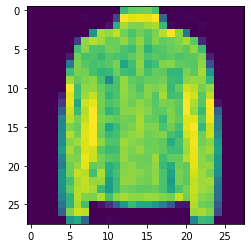

In [7]:
# Thay đổi lại kích thước ảnh
image = x_train[55,:].reshape((28,28))
plt.imshow(image)
plt.show()

In [8]:
# Thiết lập các thông số
image_rows = 28

image_cols = 28

batch_size = 512

image_shape = (image_rows,image_cols,1) # Định nghĩa kích thước ảnh và 1 là cho ảnh 3D


In [9]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [10]:
# Mô hình mạng
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    
    Conv2D(filters=64,kernel_size=3,activation='relu',input_shape = image_shape),
    Conv2D(filters=64,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Show mô hình mạng
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)         

In [11]:
# Thực hiện biên soạn mô hình
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [12]:
# Hàm thực thi với số epoch là 50 và kích thước mỗi batch là 512
history = cnn_model.fit(x_train,y_train,batch_size=batch_size,epochs=50, verbose=1,
validation_data=(x_validate,y_validate),
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 62s 1ms/step - loss: 0.9756 - accuracy: 0.6681 - val_loss: 1.8235 - val_accuracy: 0.3627
Epoch 2/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.5469 - accuracy: 0.7996 - val_loss: 1.5184 - val_accuracy: 0.6657
Epoch 3/50
48000/48000 [==============================] - 61s 1ms/step - loss: 0.4450 - accuracy: 0.8399 - val_loss: 1.0318 - val_accuracy: 0.8695
Epoch 4/50
48000/48000 [==============================] - 61s 1ms/step - loss: 0.3857 - accuracy: 0.8619 - val_loss: 0.6469 - val_accuracy: 0.8653
Epoch 5/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.3509 - accuracy: 0.8757 - val_loss: 0.3846 - val_accuracy: 0.8992
Epoch 6/50
48000/48000 [==============================] - 62s 1ms/step - loss: 0.3253 - accuracy: 0.8836 - val_loss: 0.2898 - val_accuracy: 0.8934
Epoch 7/50
48000/48000 [==============================] - 59s 1ms/st

Đánh giá độ chính xác trên tập test

In [13]:
# Thực hiện dự đoán lớp trên tập fashion-mnist_test
predicted_classes = cnn_model.predict_classes(x_test)

#get the indices to be plotted

y_true = test_df.iloc[:, 0]

correct = np.nonzero(predicted_classes==y_true)[0]

incorrect = np.nonzero(predicted_classes!=y_true)[0]

target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.93      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.91      0.92      0.91      1000
     Class 3       0.93      0.94      0.94      1000
     Class 4       0.89      0.93      0.91      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.88      0.73      0.80      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.97      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

